In [33]:
import numpy as np
import pandas as pd 
import matplotlib  
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
# Path of the file to read
filepath = "pokemon.csv"

# Read the file 
poke_data = pd.read_csv(filepath, 
                           index_col = 'pokedex_number')

In [38]:
poke_data.shape

(801, 42)

In [4]:
poke_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [46]:
# One thing we note from above is that the first column of the DataFrame is not the name of a Pokemon but its abilities. Though not necessary, we prefer to set the first column to be the name of a Pokemon, for a better readability. We achieve this by the following code. Pop out the column 'name'
poke_name = poke_data.pop('name')
poke_data.insert(0,'name',poke_name)
poke_data.insert(1,'japanese_name',poke_data.pop('japanese_name'))
poke_data.head(11)

,name,japanese_name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,total_power
0,Bulbasaur,Fushigidaneフシギダネ,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,...,1,65,65,45,grass,poison,6.9,1,0,318
1,Ivysaur,Fushigisouフシギソウ,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,...,2,80,80,60,grass,poison,13.0,1,0,405
2,Venusaur,Fushigibanaフシギバナ,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,...,3,122,120,80,grass,poison,100.0,1,0,625
3,Charmander,Hitokageヒトカゲ,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,4,60,50,65,fire,NaN,8.5,1,0,309
4,Charmeleon,Lizardoリザード,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,5,80,65,80,fire,NaN,19.0,1,0,405
5,Charizard,Lizardonリザードン,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,6,159,115,100,fire,flying,90.5,1,0,634
6,Squirtle,Zenigameゼニガメ,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,...,7,50,64,43,water,NaN,9.0,1,0,314
7,Wartortle,Kameilカメール,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,...,8,65,80,58,water,NaN,22.5,1,0,405
8,Blastoise,Kamexカメックス,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,...,9,135,115,78,water,NaN,85.5,1,0,630
9,Caterpie,Caterpieキャタピー,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,...,10,20,20,45,bug,NaN,2.9,1,0,195


In [47]:
poke_data.tail(5)

,name,japanese_name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,total_power
796,Celesteela,Tekkaguyaテッカグヤ,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,...,797,107,101,61,steel,flying,999.9,7,1,570
797,Kartana,Kamiturugiカミツルギ,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,...,798,59,31,109,grass,steel,0.1,7,1,570
798,Guzzlord,Akuzikingアクジキング,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,...,799,97,53,43,dark,dragon,888.0,7,1,570
799,Necrozma,Necrozmaネクロズマ,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,...,800,127,89,79,psychic,NaN,230.0,7,1,600
800,Magearna,Magearnaマギアナ,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,...,801,130,115,65,steel,fairy,80.5,7,1,600


In [8]:
base_stats = poke_data[['hp','attack','defense','sp_attack','sp_defense','speed']]
base_stats.describe()

,hp,attack,defense,sp_attack,sp_defense,speed
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582
std,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000
75%,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000
max,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000


In [9]:
poke_stats = poke_data[['height_m', 'weight_kg', 'capture_rate', 'base_egg_steps', 'experience_growth', 'base_happiness']]
poke_stats.describe()

,height_m,weight_kg,base_egg_steps,experience_growth,base_happiness
count,781.000000,781.000000,801.000000,8.010000e+02,801.000000
mean,1.163892,61.378105,7191.011236,1.054996e+06,65.362047
std,1.080326,109.354766,6558.220422,1.602558e+05,19.598948
min,0.100000,0.100000,1280.000000,6.000000e+05,0.000000
25%,0.600000,9.000000,5120.000000,1.000000e+06,70.000000
50%,1.000000,27.300000,5120.000000,1.000000e+06,70.000000
75%,1.500000,64.800000,6400.000000,1.059860e+06,70.000000
max,14.500000,999.900000,30720.000000,1.640000e+06,140.000000


In [10]:
poke_data.isnull().any()
#we can see that height_m, percentage_male, type2 and weight_kg have null values

name                 False
japanese_name        False
abilities            False
against_bug          False
against_dark         False
against_dragon       False
against_electric     False
against_fairy        False
against_fight        False
against_fire         False
against_flying       False
against_ghost        False
against_grass        False
against_ground       False
against_ice          False
against_normal       False
against_poison       False
against_psychic      False
against_rock         False
against_steel        False
against_water        False
attack               False
base_egg_steps       False
base_happiness       False
base_total           False
capture_rate         False
classfication        False
defense              False
experience_growth    False
height_m              True
hp                   False
percentage_male       True
sp_attack            False
sp_defense           False
speed                False
type1                False
type2                 True
w

In [48]:
# First, name the above series as column_with_NaN
NaN_column = poke_data.isnull().any()

# Then, use .sum() function to count 
poke_data.isnull().sum()[NaN_column]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

In [12]:
poke_data['type2'].fillna('None', inplace=True) # Replacing the values in type2 with None
poke_data['percentage_male'].fillna('None', inplace=True) # Replacing the values in percentage_male with None
poke_data['height_m'].fillna(poke_data['height_m'].mean(), inplace=True) # Replacing the values in height_m with Mode value of the whole column
poke_data['weight_kg'].fillna(poke_data['weight_kg'].mean(), inplace=True) # Replacing the values in weight_kg with mode value of the whole column
poke_data.isnull().sum()

name                 0
japanese_name        0
abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

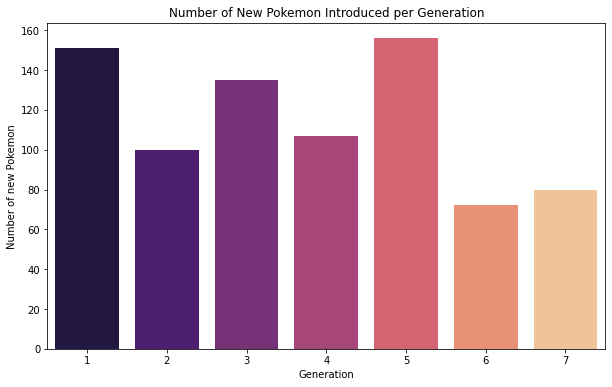

In [13]:
# Count the number of new Pokemon introduced per generation
generation_counts = poke_data['generation'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=generation_counts.index, y=generation_counts.values, palette='magma')
plt.title('Number of New Pokemon Introduced per Generation')
plt.xlabel('Generation')
plt.ylabel('Number of new Pokemon')
plt.show()

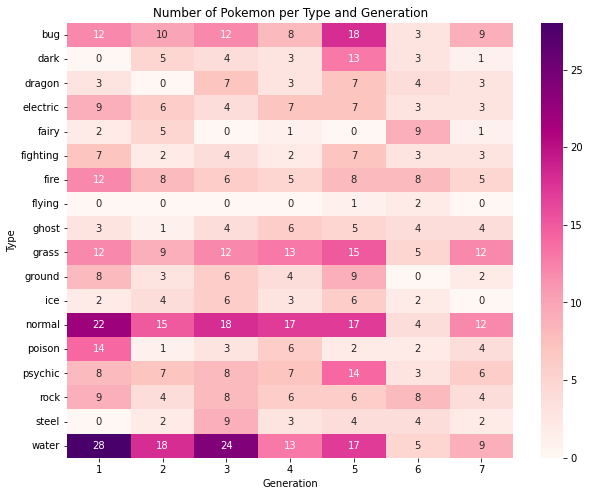

In [52]:
# Create a pivot table with the count of Pokemon per type and generation
type_generation_counts = poke_data.pivot_table(index='type1', columns='generation', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(type_generation_counts, cmap='RdPu', annot=True, fmt='d')
plt.title('Number of Pokemon per Type and Generation')
plt.xlabel('Generation')
plt.ylabel('Type')
plt.show()

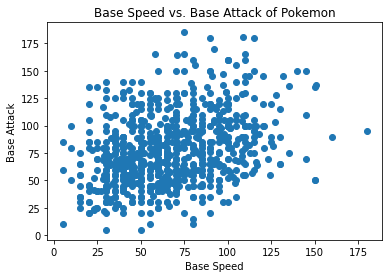

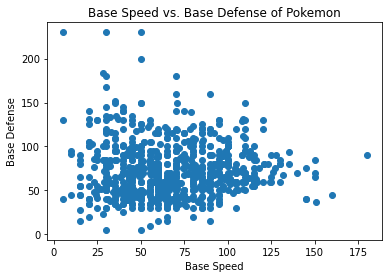

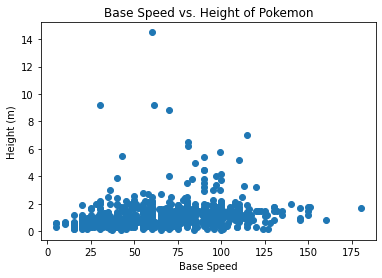

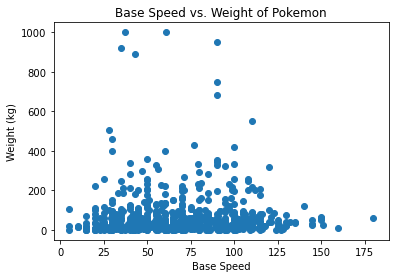

In [14]:
plt.scatter(poke_data["speed"], poke_data["attack"])
plt.xlabel("Base Speed")
plt.ylabel("Base Attack")
plt.title("Base Speed vs. Base Attack of Pokemon")
plt.show()

# Create scatterplot for base speed vs. base defense
plt.scatter(poke_data["speed"], poke_data["defense"])
plt.xlabel("Base Speed")
plt.ylabel("Base Defense")
plt.title("Base Speed vs. Base Defense of Pokemon")
plt.show()

# Create scatterplot for base speed vs. height
plt.scatter(poke_data["speed"], poke_data["height_m"])
plt.xlabel("Base Speed")
plt.ylabel("Height (m)")
plt.title("Base Speed vs. Height of Pokemon")
plt.show()

# Create scatterplot for base speed vs. weight
plt.scatter(poke_data["speed"], poke_data["weight_kg"])
plt.xlabel("Base Speed")
plt.ylabel("Weight (kg)")
plt.title("Base Speed vs. Weight of Pokemon")
plt.show()

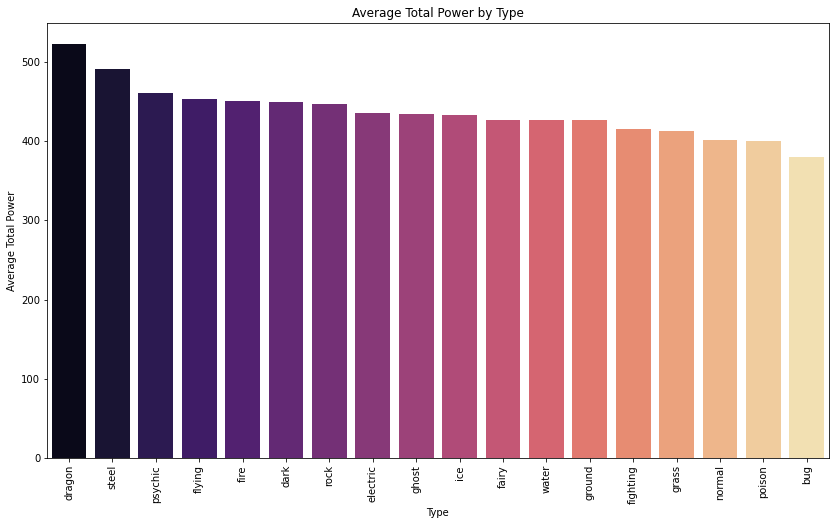

['Mewtwo', 'Rayquaza', 'Groudon', 'Kyogre', 'Arceus', 'Tyranitar']

In [55]:
poke_data['total_power'] = poke_data[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)
type_power = poke_data.groupby('type1')['total_power'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(x=type_power.index, y=type_power.values, palette='magma')
plt.title('Average Total Power by Type')
plt.xlabel('Type')
plt.ylabel('Average Total Power')
plt.xticks(rotation=90)
plt.show()

sorted_data = poke_data.sort_values(by='total_power', ascending=False)

dream_team = []

# Initialize an empty set to store the types of the dream team
types = set()

for _, row in sorted_data.iterrows():
    # If the dream team already has 6 Pokemon, break the loop
    if len(dream_team) == 6:
        break
    # If the Pokemon's type1 or type2 is not in the types set, add the Pokemon to the dream team and add its types to the types set
    if row['type1'] not in types or (pd.notnull(row['type2']) and row['type2'] not in types):
        dream_team.append(row['name'])
        types.add(row['type1'])
        if pd.notnull(row['type2']):
            types.add(row['type2'])

dream_team

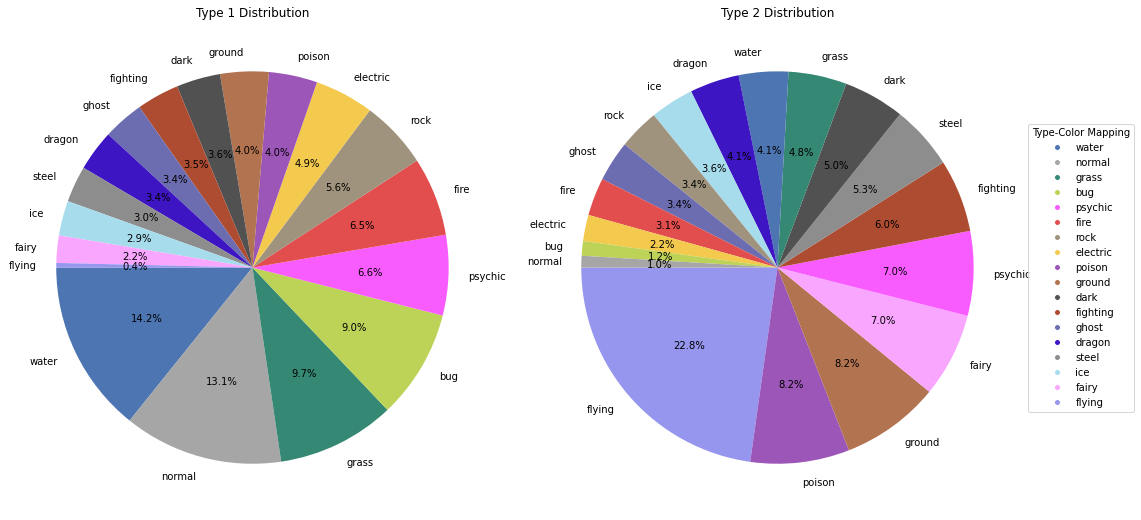

In [49]:
import matplotlib.pyplot as plt

# Define the color dictionary
color_dict = {
    "Grass": "#358873",
    "Fire": "#E24D4D",
    "Water": "#4C75B2",
    "Bug": "#BDD358",
    "Normal": "#A6A6A6",
    "Poison": "#9C56B8",
    "Electric": "#F3CA4E",
    "Ground": "#B27350",
    "Fairy": "#F9A6FF",
    "Fighting": "#AE4C32",
    "Psychic": "#F85CFF",
    "Rock": "#A0937D",
    "Ghost": "#6C6CB1",
    "Ice": "#A7DCEC",
    "Dragon": "#3D15C3",
    "Dark": "#515151",
    "Steel": "#8D8D8D",
    "Flying": "#9696EF"
}

color_dict_lower = {k.lower(): v for k, v in color_dict.items()}

type1_counts = poke_data["type1"].value_counts()
type1_labels = type1_counts.index
type1_percentages = (type1_counts / type1_counts.sum()) * 100

type2_counts = poke_data["type2"].value_counts()
type2_labels = type2_counts.index
type2_percentages = (type2_counts / type2_counts.sum()) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

type1_pie = ax1.pie(type1_percentages, labels=type1_labels, autopct="%1.1f%%", startangle=180, colors=[color_dict_lower.get(t, "#000000") for t in type1_labels])
ax1.set_title("Type 1 Distribution")

type2_pie = ax2.pie(type2_percentages, labels=type2_labels, autopct="%1.1f%%", startangle=180, colors=[color_dict_lower.get(t, "#000000") for t in type2_labels])
ax2.set_title("Type 2 Distribution")

legend_elements = [plt.Line2D([0], [0], marker="o", color="w", label=t, markerfacecolor=color_dict_lower.get(t, "#000000")) for t in type1_labels]
ax2.legend(handles=legend_elements, title="Type-Color Mapping", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.show()


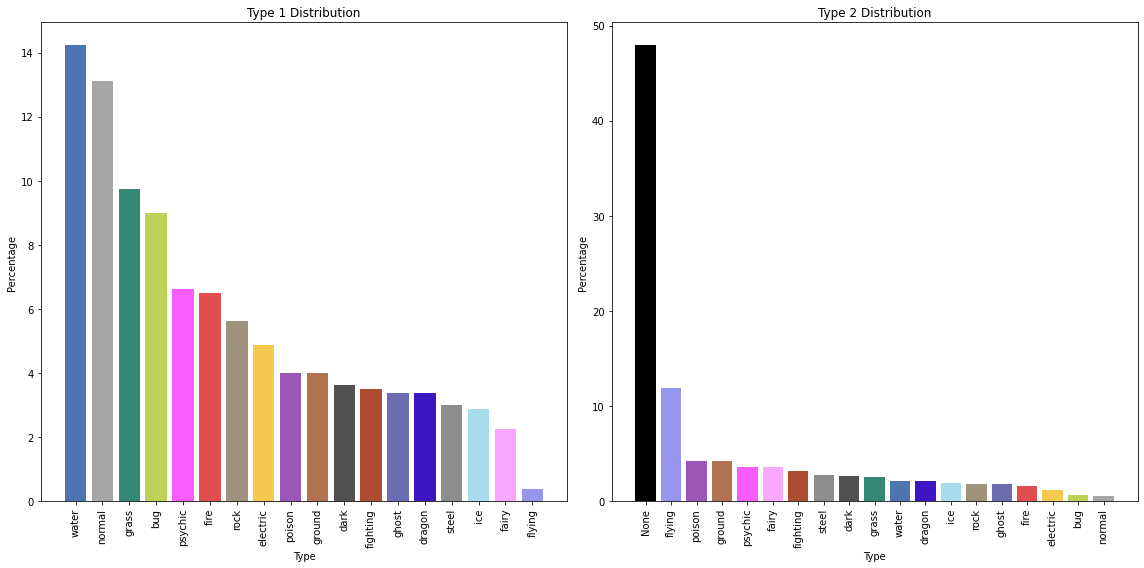

In [16]:
# Create a figure with two subplots for the bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the bar chart for Type 1 distribution
type1_bar = ax1.bar(type1_labels, type1_percentages, color=[color_dict_lower.get(t, "#000000") for t in type1_labels])
ax1.set_title("Type 1 Distribution")
ax1.set_xlabel('Type')
ax1.set_ylabel('Percentage')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

# Plot the bar chart for Type 2 distribution
type2_bar = ax2.bar(type2_labels, type2_percentages, color=[color_dict_lower.get(t, "#000000") for t in type2_labels])
ax2.set_title("Type 2 Distribution")
ax2.set_xlabel('Type')
ax2.set_ylabel('Percentage')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)

# Adjust the layout
plt.tight_layout()

# Display the bar charts
plt.show()

In [20]:
top_defense = poke_data.nlargest(10, 'defense')[['name', 'type1', 'type2', 'defense', 'base_total', 'is_legendary']]

top_attack = poke_data.nlargest(10, 'attack')[['name', 'type1', 'type2', 'attack', 'base_total', 'is_legendary']]

top_sp_defense = poke_data.nlargest(10, 'sp_defense')[['name', 'type1', 'type2', 'sp_defense', 'base_total', 'is_legendary']]

top_sp_attack = poke_data.nlargest(10, 'sp_attack')[['name', 'type1', 'type2', 'sp_attack', 'base_total', 'is_legendary']]

In [23]:
top_defense

,name,type1,type2,defense,base_total,is_legendary
pokedex_number,,,,,,
208,Steelix,steel,ground,230,610,0
213,Shuckle,bug,rock,230,505,0
306,Aggron,steel,rock,230,630,0
377,Regirock,rock,None,200,580,1
713,Avalugg,ice,None,184,514,0
80,Slowbro,water,psychic,180,590,0
91,Cloyster,water,ice,180,525,0
411,Bastiodon,rock,steel,168,495,0
95,Onix,rock,ground,160,385,0


In [24]:
top_attack

,name,type1,type2,attack,base_total,is_legendary
pokedex_number,,,,,,
214,Heracross,bug,fighting,185,600,0
798,Kartana,grass,steel,181,570,1
383,Groudon,ground,None,180,770,1
384,Rayquaza,dragon,flying,180,780,1
445,Garchomp,dragon,ground,170,700,0
354,Banette,ghost,None,165,555,0
409,Rampardos,rock,None,165,495,0
475,Gallade,psychic,fighting,165,618,0
248,Tyranitar,rock,dark,164,700,0


In [25]:
top_sp_defense

,name,type1,type2,sp_defense,base_total,is_legendary
pokedex_number,,,,,,
213,Shuckle,bug,rock,230,505,0
378,Regice,ice,None,200,580,1
382,Kyogre,water,None,160,770,1
249,Lugia,psychic,flying,154,680,1
250,Ho-Oh,fire,flying,154,680,1
671,Florges,fairy,None,154,552,0
379,Registeel,steel,None,150,580,1
380,Latias,dragon,psychic,150,700,1
476,Probopass,rock,steel,150,525,0


In [26]:
top_sp_attack

,name,type1,type2,sp_attack,base_total,is_legendary
pokedex_number,,,,,,
150,Mewtwo,psychic,None,194,780,1
382,Kyogre,water,None,180,770,1
384,Rayquaza,dragon,flying,180,780,1
65,Alakazam,psychic,None,175,600,0
796,Xurkitree,electric,None,173,570,1
94,Gengar,ghost,poison,170,600,0
646,Kyurem,dragon,ice,170,700,1
720,Hoopa,psychic,ghost,170,680,1
181,Ampharos,electric,None,165,610,0


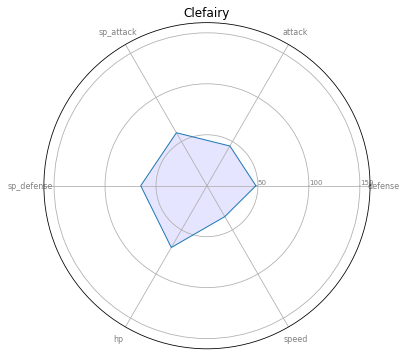

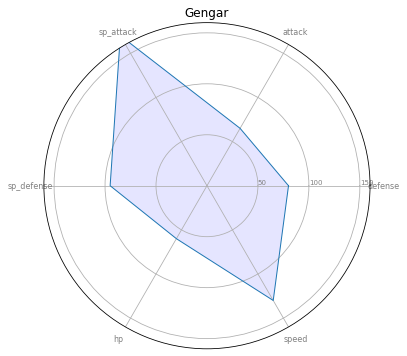

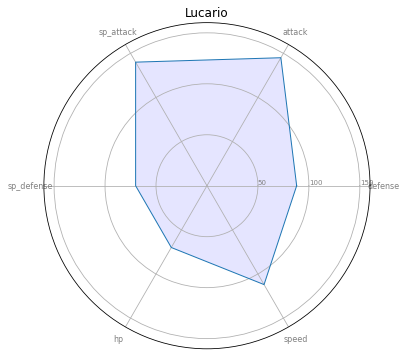

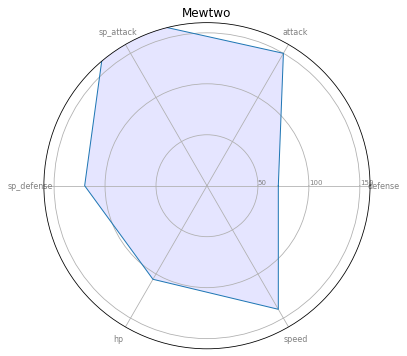

In [34]:
import math
import matplotlib.pyplot as plt
import pandas as pd

poke_data = pd.read_csv('pokemon.csv')

def create_radar_chart(pokemon_name):
    pokemon = poke_data[poke_data['name'] == pokemon_name]
    properties = ['defense', 'attack', 'sp_attack', 'sp_defense', 'hp', 'speed']

    values = pokemon[properties].values.flatten().tolist()
    values += values[:1]  # repeat the first value to close the circular graph

    # Calculate the angle of each axis in the plot
    num_vars = len(properties)
    angles = [n / float(num_vars) * 2 * math.pi for n in range(num_vars)]
    angles += angles[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], properties, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([50, 100, 150], ['50', '100', '150'], color='grey', size=7)
    plt.ylim(0, 160)

    ax.plot(angles, values, linewidth=1, linestyle='solid')

    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(pokemon_name)
    plt.show()

for pokemon in ['Clefairy', 'Gengar', 'Lucario', 'Mewtwo']:
    create_radar_chart(pokemon)


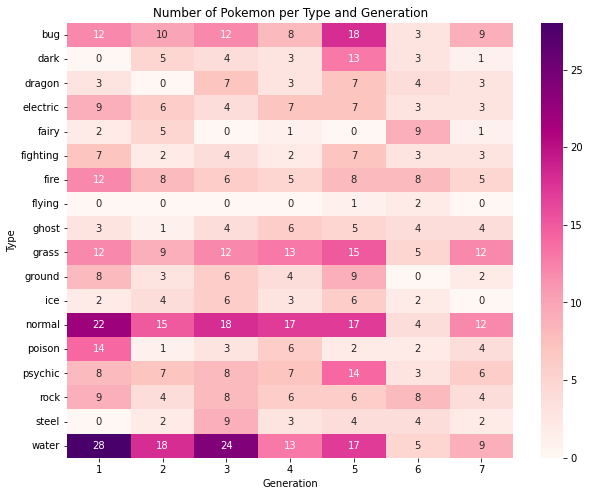

In [56]:
type_generation_counts = poke_data.pivot_table(index='type1', columns='generation', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(type_generation_counts, cmap='RdPu', annot=True, fmt='d')
plt.title('Number of Pokemon per Type and Generation')
plt.xlabel('Generation')
plt.ylabel('Type')
plt.show()